In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (10, 10)

## Homework description

Create a binary segmentation for image. Use segmentation to find bitten potatoes

## Potatoes easy mode

##### Load: color, gray, blur, threshold

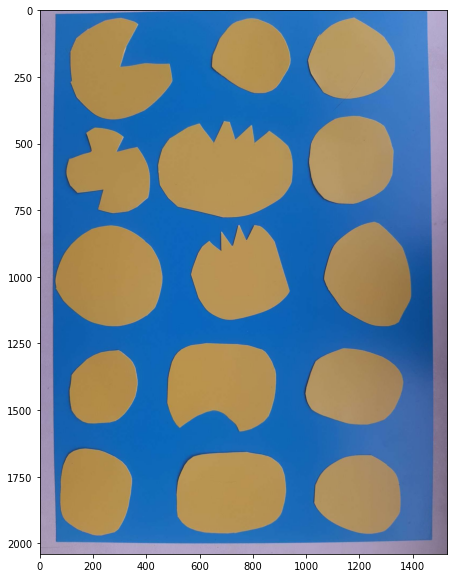

In [ ]:
img = cv2.imread('potata_easy.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

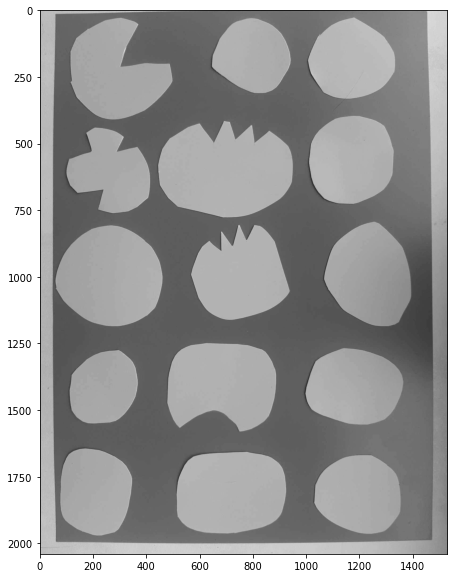

In [ ]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscale, cmap='gray')

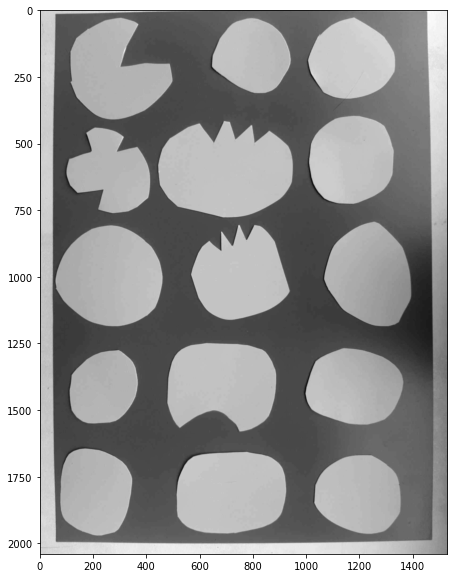

In [ ]:
img_blurred = cv2.GaussianBlur(img_grayscale, (5, 5), 0)
plt.imshow(img_blurred, cmap='gray')

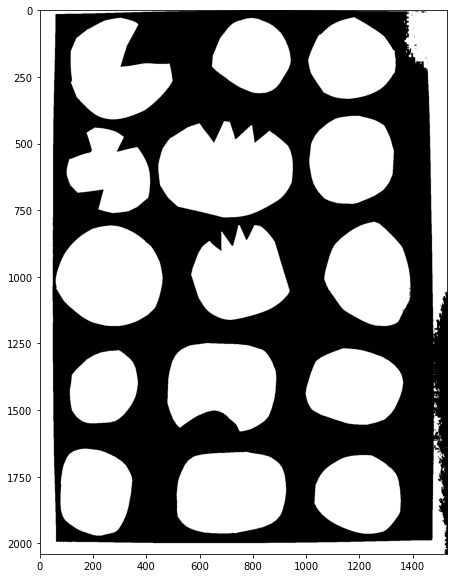

In [ ]:
_, img_binarized = cv2.threshold(img_blurred,120,255,cv2.THRESH_BINARY)
plt.imshow(img_binarized, cmap='gray')

##### Find contours of potatoes

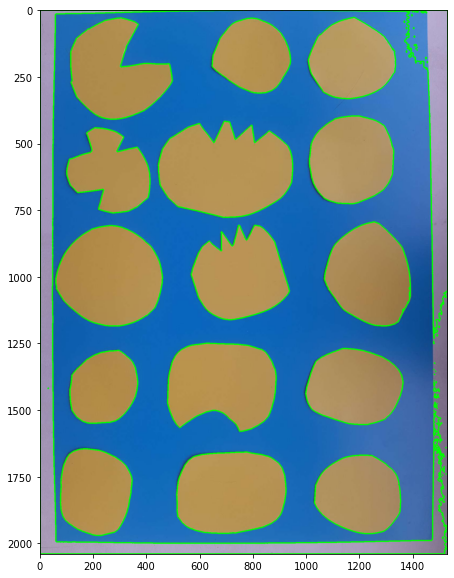

In [ ]:
contours, hierarchy = cv2.findContours(img_binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_rgb_copy = img_rgb.copy()
cv2.drawContours(img_rgb_copy, contours, -1, (0,255,0), 3)
plt.imshow(img_rgb_copy)

In [ ]:
len(contours)

100

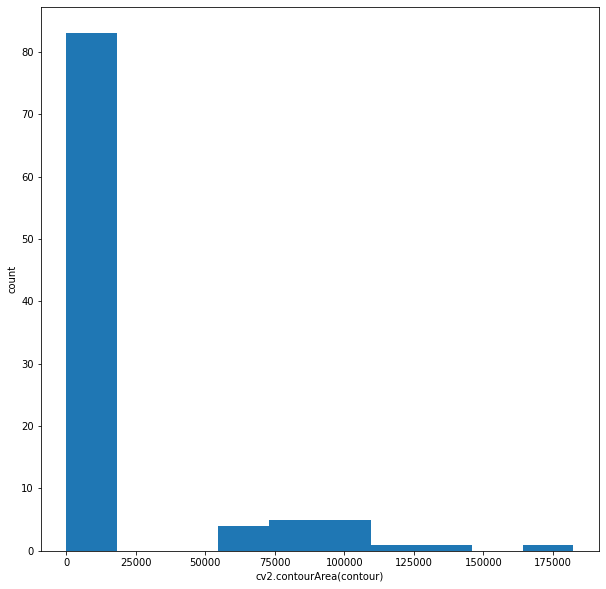

In [ ]:
plt.hist([cv2.contourArea(contour) for contour in contours])
plt.xlabel('cv2.contourArea(contour)')
plt.ylabel('count')
plt.show()

In [ ]:
contours_selected = [contour for contour in contours if (cv2.contourArea(contour) > 20000 and cv2.contourArea(contour) < 175000)]
len(contours_selected)

16

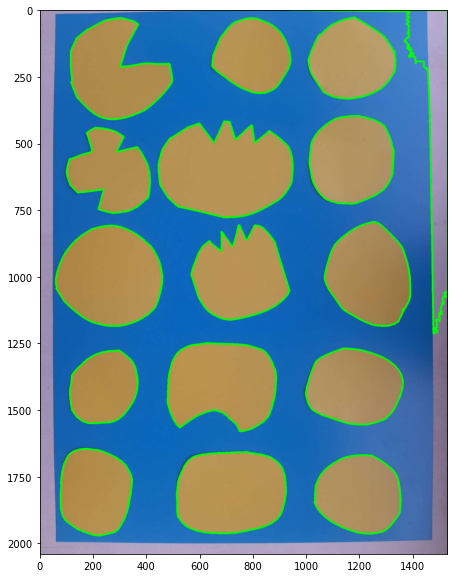

In [ ]:
img_rgb_copy = img_rgb.copy()
cv2.drawContours(img_rgb_copy, contours_selected, -1, (0,255,0), 5)
plt.imshow(img_rgb_copy)

In [ ]:
is_edge_contour = lambda x: (0 in x[0] or 0 in x[1] or img.shape[0] in x[0] or img.shape[1] in x[0])

In [ ]:
edge_contours = [contour for contour in contours_selected if is_edge_contour(contour)]
len(edge_contours)

1

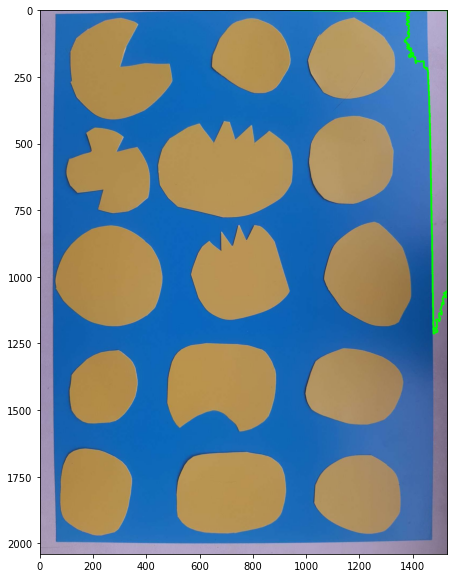

In [ ]:
img_rgb_copy = img_rgb.copy()
cv2.drawContours(img_rgb_copy, edge_contours, -1, (0,255,0), 5)
plt.imshow(img_rgb_copy)

In [ ]:
not_edge_contours = [contour for contour in contours_selected if not is_edge_contour(contour)]
len(not_edge_contours)

15

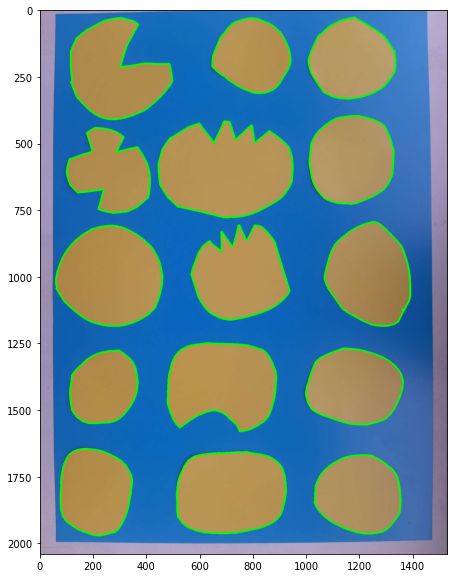

In [ ]:
img_rgb_copy = img_rgb.copy()
cv2.drawContours(img_rgb_copy, not_edge_contours, -1, (0,255,0), 5)
plt.imshow(img_rgb_copy)

##### Find bitten potatoes by comparing areas of convex hulls and potatoes' contours

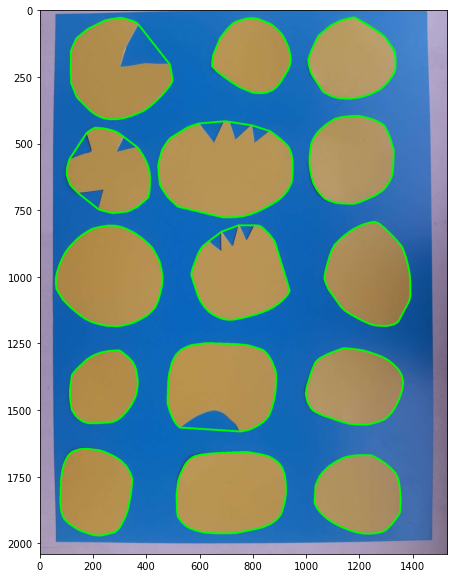

In [ ]:
img_with_hull = img_rgb.copy()
for contour in not_edge_contours:
  hull = cv2.convexHull(contour)
  cv2.drawContours(img_with_hull, [hull], -1, (0,255,0), 5)
plt.imshow(img_with_hull, cmap='gray')

In [ ]:
for contour in not_edge_contours:
  hull = cv2.convexHull(contour)
  print('contour area', cv2.contourArea(contour))
  print('hull area', cv2.contourArea(hull))
  print('---')

contour area 75118.5
hull area 75444.0
---
contour area 107859.5
hull area 108406.5
---
contour area 71175.0
hull area 71576.5
---
contour area 55233.5
hull area 55564.5
---
contour area 81185.5
hull area 81586.5
---
contour area 106867.0
hull area 117622.5
---
contour area 115424.5
hull area 115865.5
---
contour area 91335.0
hull area 97422.5
---
contour area 92849.5
hull area 93344.5
---
contour area 64761.0
hull area 73788.5
---
contour area 137166.0
hull area 145917.0
---
contour area 84825.0
hull area 85238.0
---
contour area 60833.0
hull area 61166.5
---
contour area 93144.5
hull area 108102.0
---
contour area 73941.5
hull area 74424.5
---


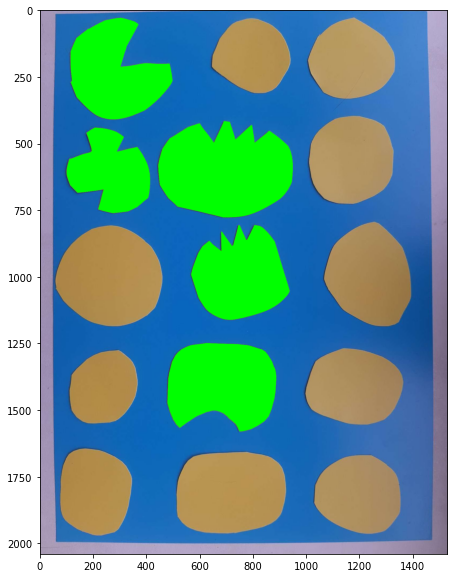

In [ ]:
img_rgb_copy = img_rgb.copy()
bitten_potatoes = []
for contour in not_edge_contours:
  hull = cv2.convexHull(contour)
  if cv2.contourArea(contour) < 0.95 * cv2.contourArea(hull):
      bitten_potatoes.append(contour)
      cv2.fillPoly(img_rgb_copy, pts=[contour], color=(0, 255, 0))
plt.imshow(img_rgb_copy)

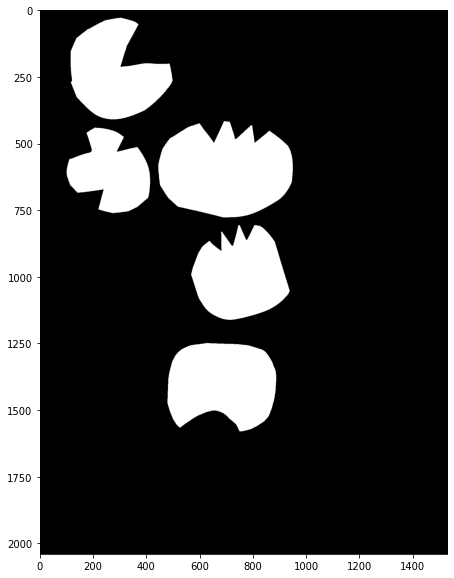

In [ ]:
img_blank = np.zeros( (img.shape[0], img.shape[1]) )
for bitten_potato in bitten_potatoes:
  cv2.fillPoly(img_blank, pts=[bitten_potato], color=(255, 255, 255))
plt.imshow(img_blank, cmap='gray')

##### All in one function

In [ ]:
def find_bitten_potatoes(img_name):
  img = cv2.imread(img_name)
  img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_blurred = cv2.GaussianBlur(img_grayscale, (5, 5), 0)
  _, img_binarized = cv2.threshold(img_blurred,120,255,cv2.THRESH_BINARY)

  contours, _ = cv2.findContours(img_binarized, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  contours_selected = [contour for contour in contours if (cv2.contourArea(contour) > 20000 and cv2.contourArea(contour) < 175000)]
  is_edge_contour = lambda x: (0 in x[0] or 0 in x[1] or img.shape[0] in x[0] or img.shape[1] in x[0])
  not_edge_contours = [contour for contour in contours_selected if not is_edge_contour(contour)]
  
  img_segmented = np.zeros( (img.shape[0], img.shape[1]) )
  for contour in not_edge_contours:
    hull = cv2.convexHull(contour)
    if cv2.contourArea(contour) < 0.95 * cv2.contourArea(hull):
        cv2.fillPoly(img_segmented, pts=[contour], color=(255, 255, 255))

  plt.imshow(img_segmented, cmap='gray')

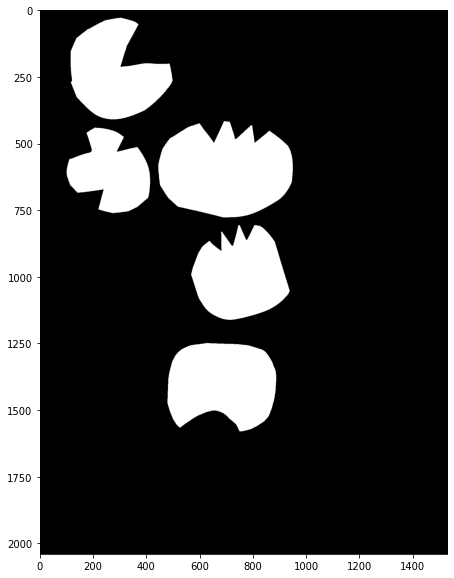

In [ ]:
find_bitten_potatoes('potata_easy.jpeg')

## Potatoes not so easy mode

#### Test on previously defined function

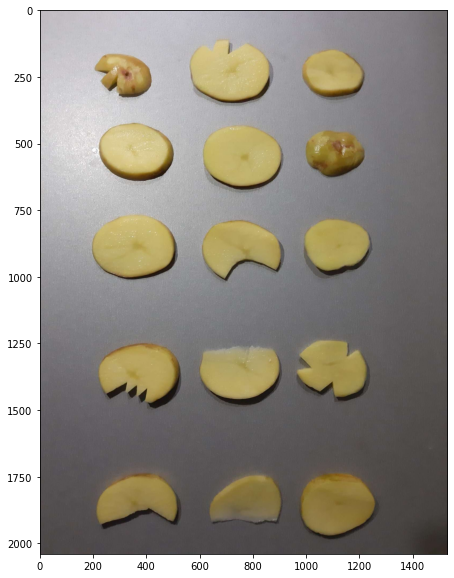

In [ ]:
img = cv2.imread('potata.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

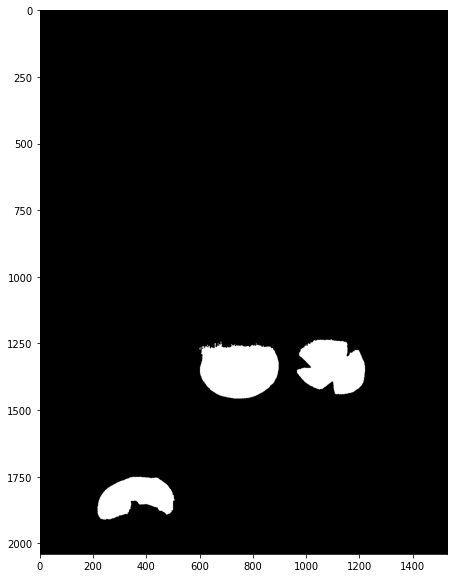

In [ ]:
find_bitten_potatoes('potata.jpeg')

#### Try new approach (and fail)

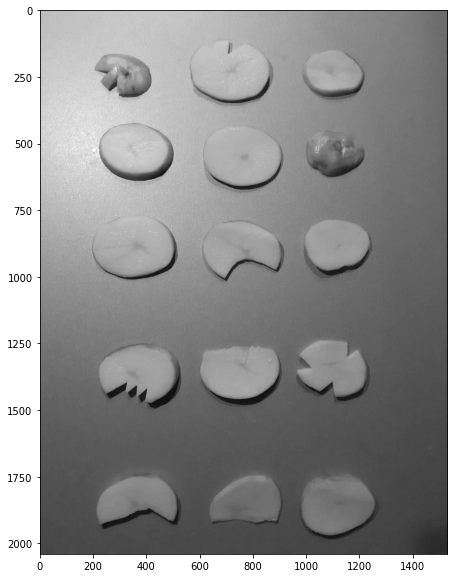

In [ ]:
img_grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscale, cmap='gray')

##### Fails

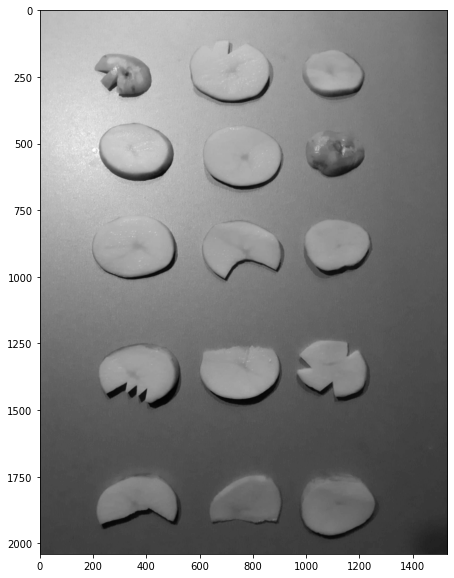

In [ ]:
img_blurred = cv2.GaussianBlur(img_grayscale, (5, 5), 0)
plt.imshow(img_blurred, cmap='gray')

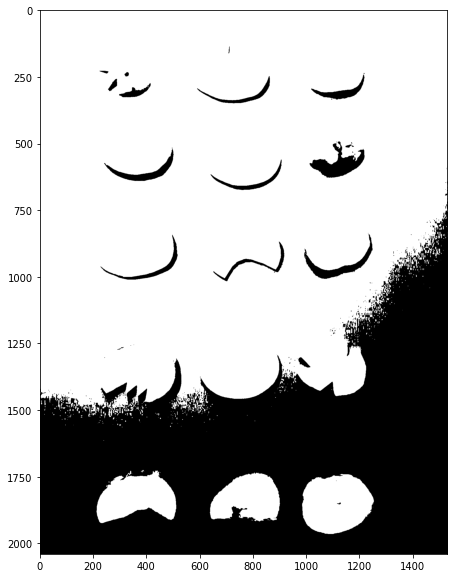

In [ ]:
_, img_binarized = cv2.threshold(img_blurred,100,255,cv2.THRESH_BINARY)
plt.imshow(img_binarized, cmap='gray')

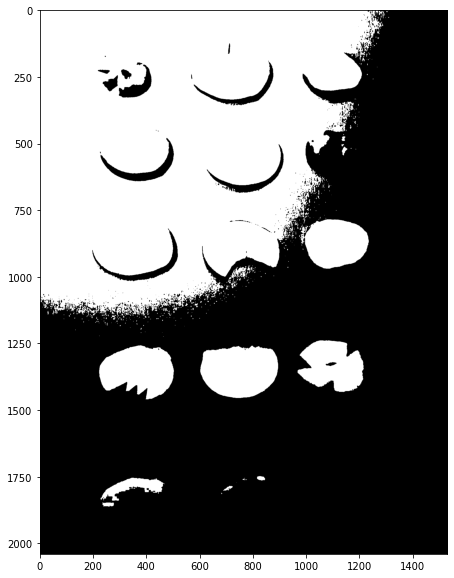

In [ ]:
_, otsu_thresh = cv2.threshold(img_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(otsu_thresh, cmap='gray')

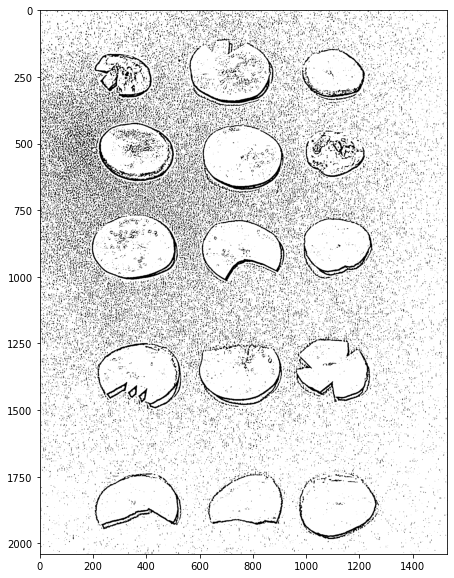

In [ ]:
adaptive_thresh = cv2.adaptiveThreshold(img_blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 2)
plt.imshow(adaptive_thresh, cmap='gray')

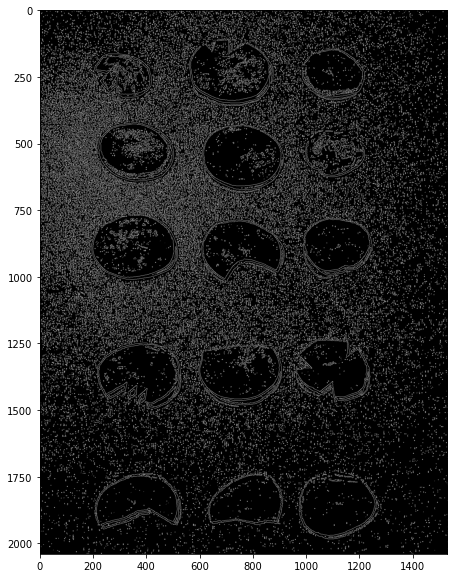

In [ ]:
canny = cv2.Canny(adaptive_thresh, 20, 50)
plt.imshow(canny, cmap='gray')

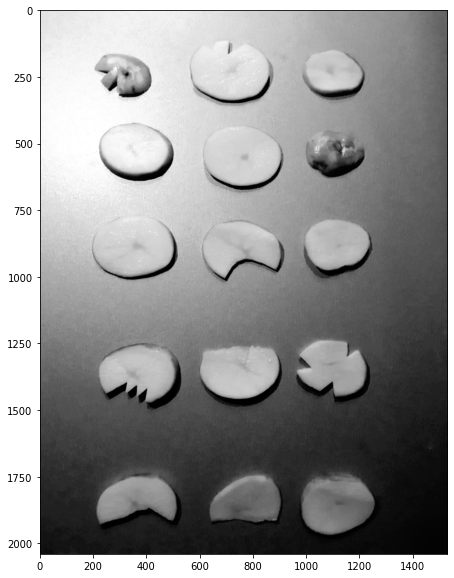

In [ ]:
img_equalized = cv2.equalizeHist(img_blurred)
plt.imshow(img_equalized, cmap='gray')

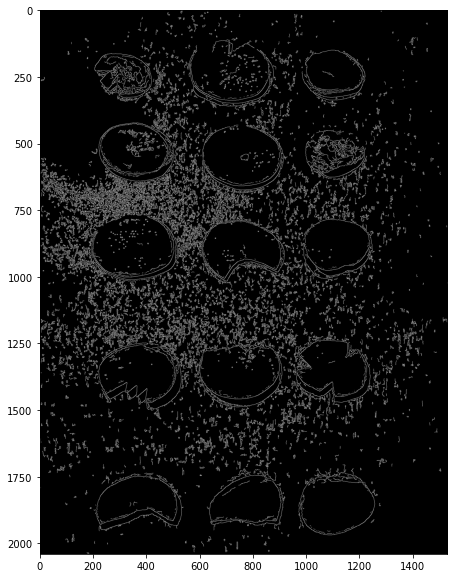

In [ ]:
canny = cv2.Canny(img_equalized, 20, 50)
plt.imshow(canny, cmap='gray')

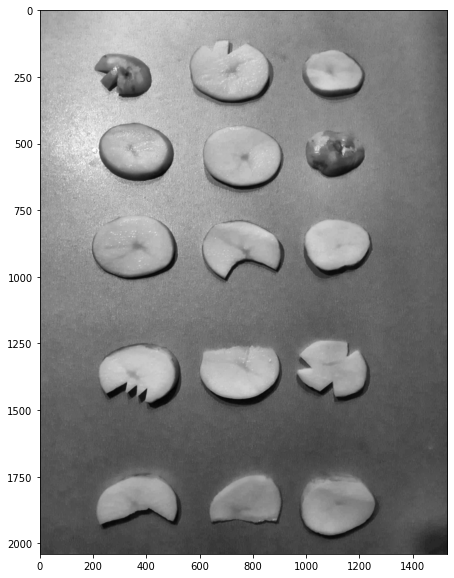

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahed = clahe.apply(img_blurred)
plt.imshow(img_clahed, cmap='gray')

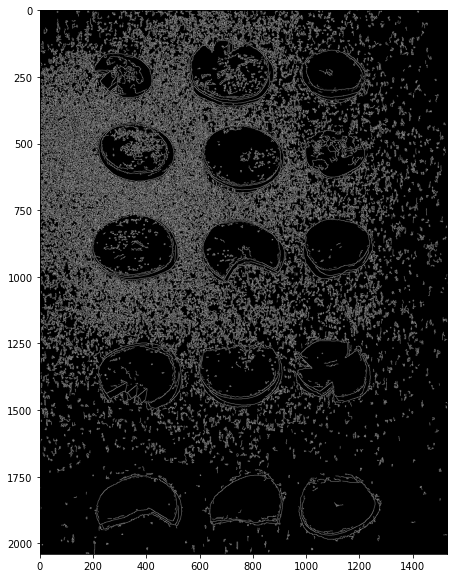

In [ ]:
canny = cv2.Canny(img_clahed, 20, 50)
plt.imshow(canny, cmap='gray')

##### Failed but the best one found

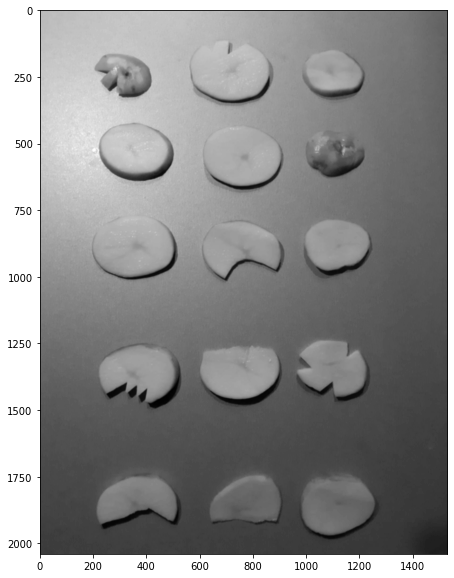

In [ ]:
img_blurred = cv2.GaussianBlur(img_grayscale, (5, 5), 8)
plt.imshow(img_blurred, cmap='gray')

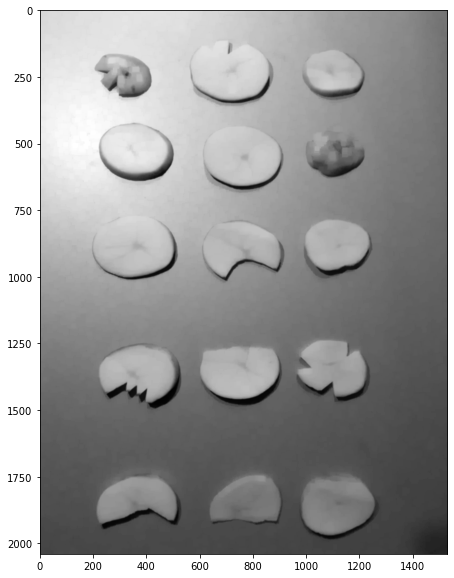

In [ ]:
kernel = np.ones((15, 15), np.uint8)
img_opened = cv2.morphologyEx(img_blurred, cv2.MORPH_OPEN, kernel)
plt.imshow(img_opened, cmap='gray')

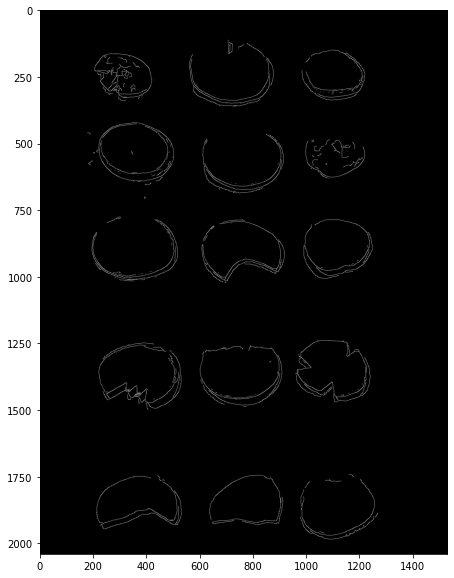

In [ ]:
edges = cv2.Canny(img_opened, 20, 40)
plt.imshow(edges, cmap='gray')

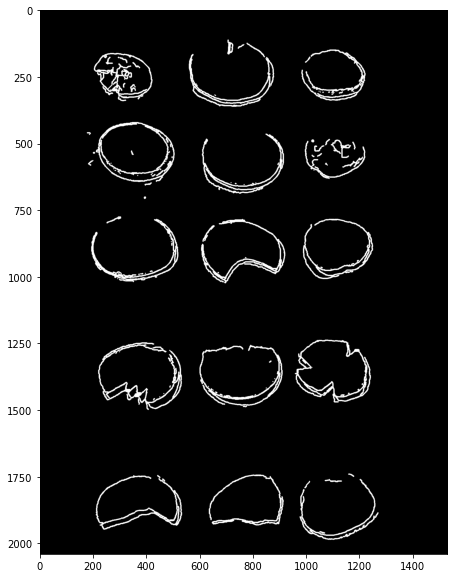

In [ ]:
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_TC89_L1)
edges_copy = edges.copy()
edge_contours = cv2.drawContours(edges_copy, contours, -1, 255, 3)
plt.imshow(edge_contours, cmap='gray')

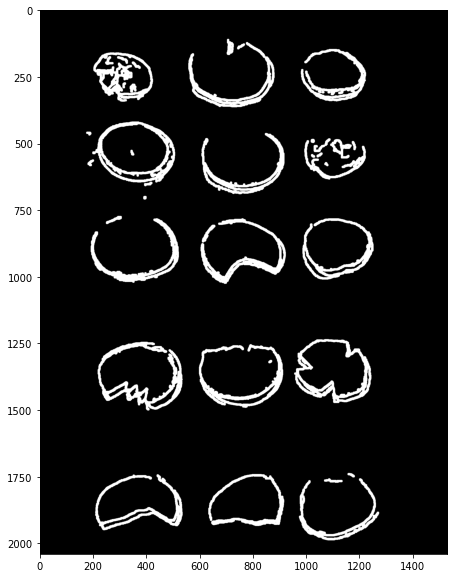

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
img_dilated = cv2.dilate(edge_contours, kernel, iterations=1)
plt.imshow(img_dilated, cmap='gray')

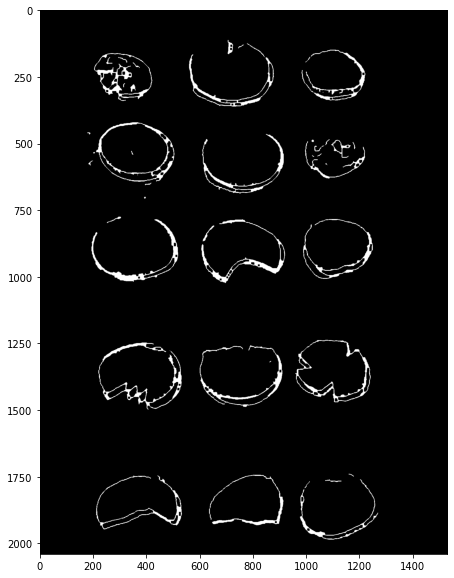

In [ ]:
kernel = np.ones((7, 7), np.uint8)
img_eroded = cv2.erode(img_dilated, kernel, iterations=1)
plt.imshow(img_eroded, cmap='gray')

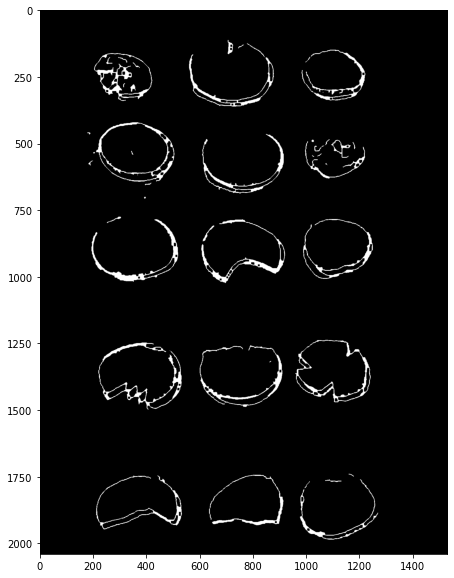

In [ ]:
kernel = np.ones((7, 7), np.uint8)
img_eroded = cv2.erode(img_dilated, kernel, iterations=1)
plt.imshow(img_eroded, cmap='gray')

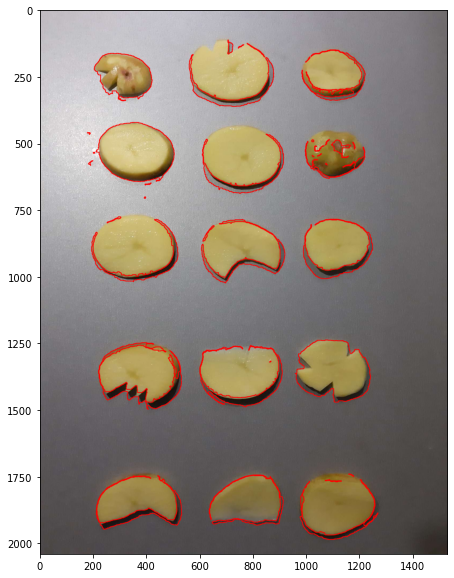

In [ ]:
contours, _ = cv2.findContours(img_eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_rgb_copy = img_rgb.copy()
cv2.drawContours(img_rgb_copy, contours, -1, (255, 0, 0), 2)
plt.imshow(img_rgb_copy)

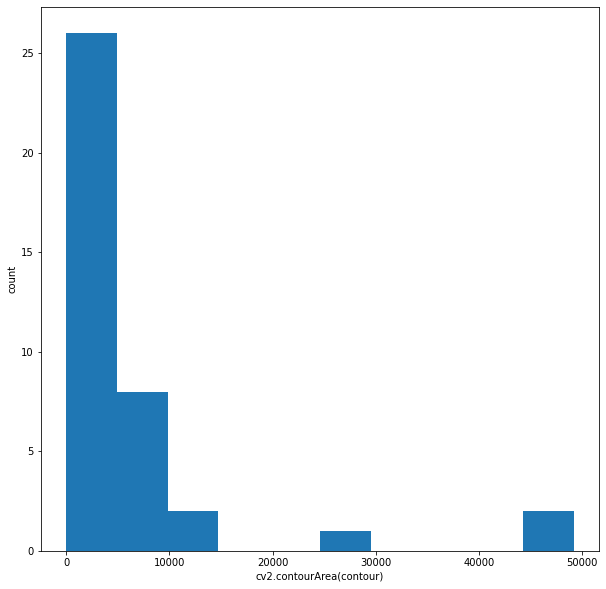

In [ ]:
plt.hist([cv2.contourArea(contour) for contour in contours])
plt.xlabel('cv2.contourArea(contour)')
plt.ylabel('count')
plt.show()

In [ ]:
contours_selected = [contour for contour in contours if (cv2.contourArea(contour) > 5000 and cv2.contourArea(contour) < 175000)]
len(contours_selected)

13

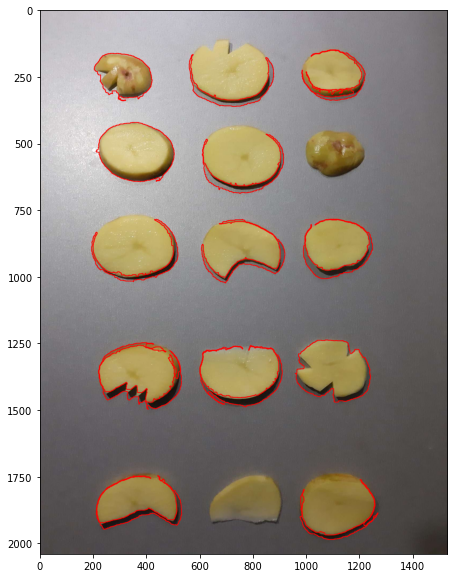

In [ ]:
img_rgb_copy = img_rgb.copy()
cv2.drawContours(img_rgb_copy, contours_selected, -1, (255, 0, 0), 2)
plt.imshow(img_rgb_copy)

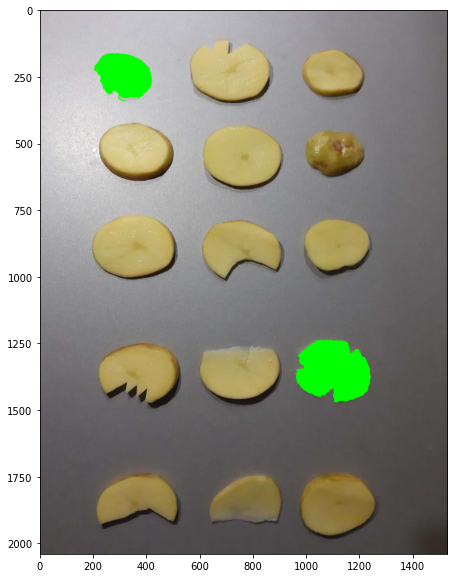

In [ ]:
img_rgb_copy = img_rgb.copy()
bitten_potatoes = []
for contour in contours_selected:
  hull = cv2.convexHull(contour)
  hull_area = cv2.contourArea(hull)
  contour_area = cv2.contourArea(contour)
  if contour_area > 0.5 * hull_area and contour_area < 0.95 * hull_area:
      bitten_potatoes.append(contour)
      cv2.fillPoly(img_rgb_copy, pts=[contour], color=(0, 255, 0))
plt.imshow(img_rgb_copy)